## Modeling ##

In [1]:
#imports for modeling

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier

In [2]:
#reading in csv file
df = pd.read_csv('./csv_files/comms_clean.csv')

In [3]:
#taking a look at the first few rows
df.head(3)

,subreddit,author,body,text_lemmatized
0,0,DMPatrick,well first all that the only way you find ...,"['well', 'first', 'all', 'that', 'the', 'only'..."
1,0,whitetempest521,the feat where almost the entire power budget...,"['the', 'feat', 'where', 'almost', 'the', 'ent..."
2,0,Th1nker26,not think problem thought the guy was ...,"['not', 'think', 'problem', 'thought', 'the', ..."


In [4]:
#looking at the perc. counts of subreddit values
#recalling 0 is 'dndnext' and 1 is 'dmacademy'
df['subreddit'].value_counts(normalize = True)

1    0.501728
0    0.498272
Name: subreddit, dtype: float64

In [5]:
#setting our X variables and y target and train_test_split
#still stratifying on y even though it's basically a 50/50 split
X = df['body']
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    random_state = 42)

y.value_counts(normalize = True)

1    0.501728
0    0.498272
Name: subreddit, dtype: float64

- Adding additional stop words:

In [6]:
#reading in the stop words from sklearn and additional stop words
#identified in the cleaning_and_eda notebook
from sklearn.feature_extraction import text

text.ENGLISH_STOP_WORDS

addn_stop_words = ['amp', 'campaign', 'character', 'combat', 'damage', 'did',
                 'dm', 'does', 'game', 'going', 'good', 'just',
                 'know', 'level', 'like', 'lot', 'magic', 'make',
                 'need', 'party', 'people', 'play', 'player', 'players',
                 'point', 'really', 'roll', 'say', 'spell', 'thing',
                 'things', 'think', 'time', 'use', 'want', 'way']

stop_words = text.ENGLISH_STOP_WORDS.union(addn_stop_words)

**Exploring Different Models**
- with CountVectorizer

In [7]:
#starting modeling with CountVectorizer to vectorizer 'body'
cvec = CountVectorizer(analyzer = 'word',                        
                         stop_words = stop_words, 
                         max_features = 10_000)
nb = MultinomialNB()
lr = LogisticRegression(max_iter = 10_000)
rf = RandomForestClassifier(random_state = 42)

In [8]:
#setting up pipeline
pipe_cvec_nb = Pipeline([
    ('cvec', cvec),
    ('nb', nb),
])

In [9]:
#getting cross_val_score:
cross_val_score(pipe_cvec_nb, X_train, y_train, cv = 5).mean()

0.7369205866466648

In [10]:
#fitting and scoring model:
pipe_cvec_nb.fit(X_train, y_train)
pipe_cvec_nb.score(X_train, y_train), pipe_cvec_nb.score(X_test, y_test)

#overfit

(0.7732786663052318, 0.7390729823134784)

In [11]:
#looking at the most influential words in the model
nb_feats = pd.DataFrame(data = nb.coef_.T, index = cvec.get_feature_names())
nb_feats.columns = ['coef_']
nb_feats['abs_coef'] = np.abs(nb_feats['coef_'])
nb_feats.sort_values(by='abs_coef', ascending = False).head(15)

C:\Users\Mary\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


,coef_,abs_coef
uas,-12.828169,12.828169
free_emotes_pack,-12.828169,12.828169
snare,-12.828169,12.828169
vale,-12.828169,12.828169
musket,-12.828169,12.828169
skirmisher,-12.828169,12.828169
vancian,-12.828169,12.828169
conjurer,-12.828169,12.828169
sickening,-12.828169,12.828169
nentir,-12.828169,12.828169


In [12]:
#setting up pipeline
pipe_cvec_lr = Pipeline([
    ('cvec', cvec),
    ('lr', lr),
])

In [13]:
#getting cross_val_score:
cross_val_score(pipe_cvec_lr, X_train, y_train, cv = 5).mean()

0.7195039849302111

In [14]:
#fitting and scoring model:
pipe_cvec_lr.fit(X_train, y_train)
pipe_cvec_lr.score(X_train, y_train), pipe_cvec_lr.score(X_test, y_test)

#extremely overfit

(0.8588370832203849, 0.7243342142711934)

In [15]:
#looking at the most influential words in the model
lr_feats = pd.DataFrame(data = lr.coef_.T, index = cvec.get_feature_names())
lr_feats.columns = ['coef_']
lr_feats['abs_coef'] = np.abs(lr_feats['coef_'])
lr_feats.sort_values(by = 'abs_coef', ascending = False).head(15)

,coef_,abs_coef
torture,2.624060,2.624060
participate,-2.545875,2.545875
flgs,-2.503960,2.503960
amazon,-2.324770,2.324770
conclave,2.301129,2.301129
guest,-2.175415,2.175415
paralyzed,2.124193,2.124193
fudged,-1.939496,1.939496
physics,-1.911757,1.911757
enforce,1.907581,1.907581


In [16]:
#setting up pipeline
pipe_cvec_rf = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

#getting cross_val_score:
cross_val_score(pipe_cvec_lr, X_train, y_train, cv = 5).mean()

0.7195039849302111

In [17]:
#fitting and scoring model:
pipe_cvec_rf.fit(X_train, y_train)
pipe_cvec_rf.score(X_train, y_train), pipe_cvec_rf.score(X_test, y_test)

#super accurate for existing data

(0.990546218487395, 0.7148810733889002)

- I'm going to further explore the MultinomialNB model, which was the least overfit for the data.

In [18]:
cvec.get_params().keys()

dict_keys(['analyzer', 'binary', 'decode_error', 'dtype', 'encoding', 'input', 'lowercase', 'max_df', 'max_features', 'min_df', 'ngram_range', 'preprocessor', 'stop_words', 'strip_accents', 'token_pattern', 'tokenizer', 'vocabulary'])

In [19]:
pipe_params = {
    'cvec__max_features': [None, 1_000, 2_000, 4_000, 8_000], 
    'cvec__min_df': [1, 2, 3], 
    'cvec__max_df': [1.0, .75, .85, .95],
    'cvec__ngram_range': [(1, 1), (1, 2)]
}

In [20]:
#instantiating GridSearchCV.
gs_cvec = GridSearchCV(pipe_cvec_nb, 
                  param_grid = pipe_params, 
                  cv = 5, 
                  verbose = 1)

In [21]:
#Fit GridSearch to training data.
gs_cvec.fit(X_train, y_train)
gs_cvec.best_params_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


{'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2)}

In [22]:
gs_cvec.best_score_

0.7547437785139663

In [23]:
gs_cvec.score(X_train, y_train), gs_cvec.score(X_test, y_test)

(0.9644890214150176, 0.7534051636511486)

**Model Evaluation**

In [24]:
#predictions:
preds = gs_cvec.predict(X_test)

#conf. matrix values:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [25]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73      4902
           1       0.72      0.83      0.77      4936

    accuracy                           0.75      9838
   macro avg       0.76      0.75      0.75      9838
weighted avg       0.76      0.75      0.75      9838



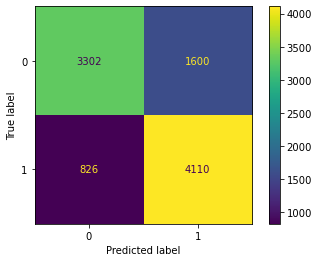

In [26]:
plot_confusion_matrix(gs_cvec, X_test, y_test, cmap = 'viridis');

**cvec with Additional n-Gram**

In [102]:
#ease of reference
cvec = CountVectorizer(analyzer = 'word',                        
                         stop_words = stop_words, 
                         max_features = 10_000,
                         ngram_range = (1,3))
nb = MultinomialNB()
lr = LogisticRegression(max_iter = 10_000)
rf = RandomForestClassifier(random_state = 42)

In [28]:
pipe_ngrams_nb = Pipeline([
    ('cvec', cvec),
    ('nb', nb)
])

cross_val_score(pipe_ngrams_nb, X_train, y_train, cv = 5).mean()

0.7358701986187749

In [29]:
pipe_ngrams_nb.fit(X_train, y_train)
pipe_ngrams_nb.score(X_train, y_train), pipe_ngrams_nb.score(X_test, y_test)

(0.767992680943345, 0.7365318154096361)

In [30]:
pipe_ngrams_lr = Pipeline([
    ('cvec', cvec),
    ('lr', lr)
])

cross_val_score(pipe_ngrams_lr, X_train, y_train, cv = 5).mean()

0.7210285645267185

In [31]:
pipe_ngrams_lr.fit(X_train, y_train)
pipe_ngrams_lr.score(X_train, y_train), pipe_ngrams_lr.score(X_test, y_test)

(0.8619883437245867, 0.7235210408619638)

In [32]:
pipe_ngrams_rf = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

cross_val_score(pipe_ngrams_rf, X_train, y_train, cv = 5).mean()

0.7122868676725783

In [33]:
pipe_ngrams_rf.fit(X_train, y_train)
pipe_ngrams_rf.score(X_train, y_train), pipe_ngrams_rf.score(X_test, y_test)

(0.9895296828408783, 0.7174222402927424)

Note that the inclusion of longer n-grams did increase our scores slightly.

**Exploring Different Models**
- with TFID

In [104]:
tf = TfidfVectorizer(analyzer = "word", 
                     stop_words = stop_words, 
                     max_features = 10_000)

In [35]:
pipe_tfid_nb = Pipeline([
    ('tf', tf),
    ('nb', nb)
])

cross_val_score(pipe_tfid_nb, X_train, y_train, cv = 5).mean()

0.7387842066417358

In [36]:
pipe_tfid_nb.fit(X_train, y_train)
pipe_tfid_nb.score(X_train, y_train), pipe_cvec_lr.score(X_test, y_test)

(0.7889671997831391, 0.7243342142711934)

In [106]:
nb_tf_feats = pd.DataFrame(data = nb.coef_.T, index = tf.get_feature_names())
nb_tf_feats.columns = ['coef_']
nb_tf_feats['abs_coef'] = np.abs(nb_tf_feats['coef_'])
nb_tf_feats.sort_values(by = 'coef_', ascending = False).head(10)

In [38]:
pipe_tfid_lr = Pipeline([
    ('tf', tf),
    ('lr', lr)
])

cross_val_score(pipe_tfid_lr, X_train, y_train, cv = 5).mean()

0.7403090503062816

In [39]:
pipe_tfid_lr.fit(X_train, y_train)
pipe_tfid_lr.score(X_train, y_train), pipe_tfid_lr.score(X_test, y_test)

(0.8157698563296286, 0.7411059158365522)

In [101]:
lr_tf_feats = pd.DataFrame(data = lr.coef_.T, index = tf.get_feature_names())
lr_tf_feats.columns = ['coef_']
lr_tf_feats['abs_coef'] = np.abs(lr_tf_feats['coef_'])
lr_tf_feats.sort_values(by = 'coef_', ascending = False).head(10)

,coef_,abs_coef
torture,4.428696,4.428696
blind,3.942432,3.942432
advice,3.113025,3.113025
perception,3.098754,3.098754
world,2.984829,2.984829
goliath,2.975844,2.975844
tarrasque,2.911631,2.911631
timer,2.595519,2.595519
conclave,2.495618,2.495618
roll20,2.365016,2.365016


In [41]:
pipe_tfid_rf = Pipeline([
    ('tf', tf),
    ('rf', rf)
])

cross_val_score(pipe_tfid_rf, X_train, y_train, cv = 5).mean()

0.7162850988759715

In [42]:
pipe_tfid_rf.fit(X_train, y_train)
pipe_tfid_rf.score(X_train, y_train), pipe_tfid_rf.score(X_test, y_test)

(0.9902751423149905, 0.7227078674527343)

- Like with cvec, I'm going to further explore the MultinomialNB model, which was the least overfit for the data.

In [43]:
pipe_tfid_nb

Pipeline(steps=[('tf',
                 TfidfVectorizer(max_features=10000,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'amp', 'an',
                                                       'and', 'another', 'any',
                                                       'anyhow', 'anyone',
      

In [44]:
tf.get_params().keys()

dict_keys(['analyzer', 'binary', 'decode_error', 'dtype', 'encoding', 'input', 'lowercase', 'max_df', 'max_features', 'min_df', 'ngram_range', 'norm', 'preprocessor', 'smooth_idf', 'stop_words', 'strip_accents', 'sublinear_tf', 'token_pattern', 'tokenizer', 'use_idf', 'vocabulary'])

In [45]:
pipe_params = {
    'tf__max_features': [None, 1_000, 2_000, 4_000, 8_000], 
    'tf__min_df': [1, 2, 3], 
    'tf__max_df': [1.0, .75, .85, .95],
    'tf__ngram_range': [(1, 1), (1, 2), (1,3)]
}

In [46]:
#instantiating GridSearchCV.
gs_tf = GridSearchCV(pipe_tfid_nb, 
                  param_grid = pipe_params, 
                  cv = 5, 
                  verbose = 1)

In [47]:
#Fit GridSearch to training data.
gs_tf.fit(X_train, y_train)
gs_tf.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


{'tf__max_df': 1.0,
 'tf__max_features': None,
 'tf__min_df': 1,
 'tf__ngram_range': (1, 3)}

In [48]:
gs_tf.best_score_

0.7526091328619873

In [49]:
gs_tf.score(X_train, y_train), gs_tf.score(X_test, y_test)

(0.9762469503930604, 0.752287050213458)

**Model Evaluation**

In [50]:
#predictions:
preds = gs_tf.predict(X_test)

#conf. matrix values:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [51]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72      4902
           1       0.71      0.85      0.78      4936

    accuracy                           0.75      9838
   macro avg       0.76      0.75      0.75      9838
weighted avg       0.76      0.75      0.75      9838



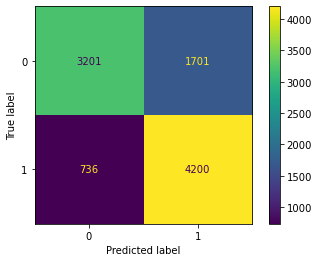

In [52]:
plot_confusion_matrix(gs_tf, X_test, y_test, cmap = 'viridis');

**Most Influential Words**

In [88]:
nb_influ = nb_feats.sort_values(by = 'coef_', ascending = False).head(20).index
nb_influ

Index(['maybe', 'world', 'fun', 'let', 'group', 'work', 'rules', 'characters',
       'feel', 'having', 'run', 'story', 'long', 'session', 'spells', 'try',
       'new', 'idea', 'sure', 'actually'],
      dtype='object')

In [89]:
nb_tf_influ = nb_tf_feats.sort_values(by = 'coef_', ascending = False).head(20).index
nb_tf_influ

Index(['world', 'maybe', 'fun', 'thanks', 'let', 'idea', 'rules', 'work',
       'group', 'great', 'right', 'characters', 'feel', 'sure', 'story',
       'session', 'run', 'having', 'new', 'bad'],
      dtype='object')

In [90]:
lr_influ = lr_feats.sort_values(by = 'coef_', ascending = False).head(20).index
lr_influ

Index(['torture', 'conclave', 'paralyzed', 'enforce', 'governs', 'generator',
       'vtt', 'unsatisfying', 'lake', 'fleshed', 'tweak', 'blind', 'flag',
       'coins', 'blindness', 'grove', 'niches', 'hydra', 'scatter',
       'charlatan'],
      dtype='object')

In [91]:
lr_tf_influ = lr_tf_feats.sort_values(by = 'coef_', ascending = False).head(20).index
lr_tf_influ

Index(['torture', 'blind', 'advice', 'perception', 'world', 'goliath',
       'tarrasque', 'timer', 'conclave', 'roll20', 'let', 'vtt', 'trap',
       'paralyzed', 'idea', 'wants', 'god', 'creativity', 'array', 'traps'],
      dtype='object')

In [92]:
#https://www.geeksforgeeks.org/python-intersection-two-lists/
def union(list_1, list_2):
    return set(list_1).intersection(list_2)

In [96]:
nb_union = union(nb_influ, nb_tf_influ)
nb_union 

{'characters',
 'feel',
 'fun',
 'group',
 'having',
 'idea',
 'let',
 'maybe',
 'new',
 'rules',
 'run',
 'session',
 'story',
 'sure',
 'work',
 'world'}

In [97]:
lr_union = union(lr_influ, lr_tf_influ)
lr_union 

{'blind', 'conclave', 'paralyzed', 'torture', 'vtt'}

In [98]:
union(nb_union, lr_union)

set()

In [100]:
tf_union = union(nb_tf_influ, lr_tf_influ)
tf_union

{'idea', 'let', 'world'}